Jan 14 ,Thr, 2021 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

# 개념
### 모집단(population)
- **빅데이터**는 **population**을 가지고 있다
- 모집단 분석을 진행할 수 있음
- 모평균(mu), 모분산(sigma^2)


### 표본(sample)
- **random**하게 추출해서 모집단을 **estimate**
- 추정(추측)통계
    - 표본집단을 통해 모집단의 평균, 편차를 추정
    - 표본평균(확률변수, x-bar), 표본분산(s^2), 
    - 표본평균의 평균(E(x-bar)=m), 표본평균의 분산(VAR(x-bar) = sigma^2/n


### 비편향 표본분산
- sigma^2/n-1


### 자유도(degrees of freedom)
- 통계적 추정을 할 때 표본자료 중 모집단에 대한 정보를 주는 독립적인 자료의 수
- 왜 n-1인가?
    - 다음의 자료를 살펴보자.

        10 14 12 18 16

        이 자료의 합계는 70이고, 평균은 14이다. 우리는 평균이 14임을 알고 있으므로 만약 위의 숫자 중 하나를 모르더라도 그 숫자를 찾아낼 수 있다. 마지막 숫자 16을 모르고 평균이 14임을 안다고 가정하자. 평균이 14이면 숫자들의 합계가 70인 것도 알 수 있다. 그리고 나머지 4개의 숫자가 각각 10, 14, 12, 18이므로 전체 합계에서 위 4개의 숫자를 빼면 마지막 숫자는 16이라는 것을 알 수 있다.

        그러므로 표본평균 값을 알고 있으면 전체 자료 중 **자유롭게 값을 취할 수 있는 관찰치의 개수는 4개**인 것이다.



In [3]:
df = pd.read_csv('../data/data3/ch4_scores400.csv')
scores = np.array(df['score']) # df['score'].values #시리즈의 속성인 values를 사용해도 ok -> ndarray
scores[:10] # ndarray객체

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80], dtype=int64)

In [229]:
df.describe()

,score
count,400.000000
mean,69.530000
std,14.393994
min,23.000000
25%,60.000000
50%,69.000000
75%,80.000000
max,100.000000


In [230]:
scores.mean() #모평균

69.53

In [6]:
len(df)

400

## 임의로 표본 추출
- np.random.choice

In [59]:
np.random.choice([1,2,3,4,54,5,6,6,7], 3, replace =True) # 복원추출

array([5, 3, 6])

In [107]:
np.random.seed(0) # seed를 주면 타인과 같은 랜덤값이 나온다. -> 강사님과 그래프와 표 비교하기 위해
sample = np.random.choice(scores, size=20 )
print( sample )
print( sample.mean() ) # 표본 평균

[49 60 72 86 52 61 77 91 80 56 69 67 90 56 75 79 60 79 68 81]
70.4


In [109]:
sample.var(ddof=0) # np.var( sample ) 
# ddof=0이기 때문에 편향 표본분산 (n=20개로 나로 나눔)

150.34000000000003

In [110]:
sample.std( ddof=0 ) # np.ste( sample )
# ddof=0이기 때문에 편향 표본편차 (n=20개로 나로 나눔)

12.261321299109653

In [111]:
sample.var( ddof=1 ) # 비편향 표본 분산( 자유도(n-1)적용 )

158.25263157894742

In [116]:
for i in range(5):
    sample1 = np.random.choice( scores, 20 )
    print( i,  '표본평균: ', sample1.mean() ) # 랜덤하게 표본추출 5번해서 각각의 표본 평균을 구함

0 표본평균:  70.7
1 표본평균:  71.9
2 표본평균:  71.25
3 표본평균:  67.4
4 표본평균:  67.7


### histogram
- density : 상대도수값으로 보여줌
    - 상대도수: 각 도수 값/ 도수 총합
    - False : y축에 도수값 기준

### 모집단 분포

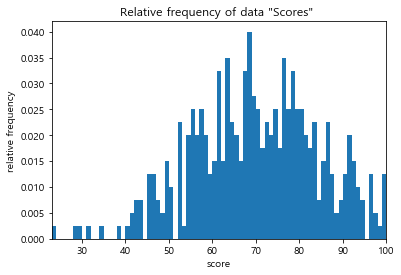

In [130]:
plt.hist(scores, bins=100, range=(0,100), density=True )
plt.xlim( scores.min() ,100 )
plt.xlabel( 'score' )
plt.ylabel( 'relative frequency' )
plt.title( 'Relative frequency of data "Scores" ')
plt.show()

### 표본집단 분포
- 표본 사이즈 10000개

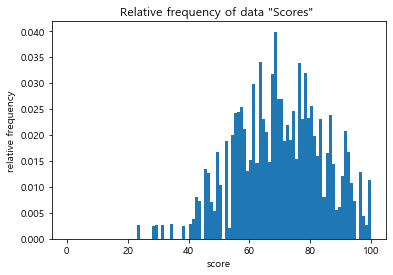

In [233]:
sample2 = np.random.choice( scores, 10000 ) 
plt.hist( sample2, bins=100 ,range=(0,100), density=True )
plt.xlabel( 'score' )
plt.ylabel( 'relative frequency' )
plt.title( 'Relative frequency of data "Scores" ')
plt.show()

### [결과1] sample size가 크면 모집단의 분포와 가까워진다

### 표본평균
- 모집단
    - sample1 (20개의 sample).mean()
    - sample2 (20개의 sample).mean()<br>
    ...
    - sample100 (20개의 sample).mean()

In [167]:
import math

In [238]:
np.random.seed(0)
n = 20 # sample size
n_sample = 100 # 표본집단 갯수
# 100번 반복하면서 [20개를 추출하는 표본집단의 평균 생성]
sample_mean =  np.array( [np.random.choice(scores, n).mean() for _ in range(n_sample)] )

In [239]:
# 표본 평균들의 집합

sample_mean # 표본집단 100개의 20개 표본들의 평균

array([70.4 , 72.45, 63.7 , 66.05, 71.7 , 74.15, 70.7 , 71.9 , 71.25,
       67.4 , 67.7 , 69.15, 69.5 , 71.35, 69.4 , 71.5 , 70.65, 69.95,
       68.8 , 69.15, 71.25, 67.85, 73.1 , 75.15, 73.95, 67.4 , 67.45,
       70.8 , 66.45, 66.5 , 68.8 , 67.1 , 72.65, 73.85, 73.  , 66.15,
       65.15, 72.8 , 72.9 , 62.2 , 67.4 , 65.75, 64.2 , 70.1 , 69.9 ,
       69.35, 67.  , 72.7 , 65.1 , 73.7 , 67.45, 74.45, 73.55, 71.45,
       70.5 , 67.75, 74.85, 77.25, 69.7 , 64.3 , 74.45, 72.85, 68.9 ,
       73.85, 66.7 , 67.7 , 68.05, 72.85, 68.1 , 64.7 , 70.15, 66.  ,
       67.8 , 69.1 , 70.45, 71.8 , 63.6 , 74.1 , 70.75, 68.9 , 70.35,
       65.1 , 62.95, 73.85, 66.7 , 68.2 , 66.9 , 75.05, 66.4 , 69.9 ,
       73.55, 71.15, 68.85, 66.35, 68.1 , 70.05, 67.35, 68.6 , 68.5 ,
       73.25])

### 1. 평균 비교

In [240]:
# 표본평균의 평균
sample_mean.mean() # E(x-bar)

69.59750000000001

In [241]:
# 모집단의 평균(모평균)
scores.mean()

69.53

### [도출1] 모집단의 평균과 표본평균의 평균값이 근사함

### 2. 분산 비교

In [242]:
# 모분산
scores.var()

206.6691

In [244]:
# 표본평균의 분산
sample_mean.var()

10.050268749999997

In [245]:
# 표본평균의 분산
scores.var()/n
#  20개 집단에 대한 분산을 알고 싶기 때문에 n으로 나눠줌

10.333454999999999

### 3. 편차 비교

In [251]:
# 표본평균의 편차(SEM: Standard Error Mean)
sample_mean.std()

3.170215883816116

In [252]:
# 표본평균의 편차
scores.std()/math.sqrt(n)

3.2145691779770424

### [도출2] 모집단의 편차와 표본평균의 편차가 근사함

### [결과2] 표본의 개수(n)가 충분히 많으면 모집단에 가까워진다

# 모평균 추정
- n개를 임의로 표본 추출
- n >= 30
- 모평균, 모편차
<br>
$ \bar{X} -k * \dfrac{ \sigma }{ \sqrt{n} } \le m \le \bar{X} +k * \dfrac{ \sigma }{ \sqrt{n} }   $ 

    - k:신뢰도 상수
<br>
- 표본갯수가 30개 이상이면 모표준편차와 표준편차를 동일한 것으로 본다


$ s = \sigma $


## 신뢰구간
- 1.96(95%신뢰도), 2.58(99%신뢰도)


## 평균의 표준오차(standard error of the mean, SEM)
$ \dfrac{ \sigma }{ \sqrt{n} } $
- 모집단의 표준편차를 sqrt(n)으로 나눈 것

In [253]:
n = 30
sample2 = np.random.choice( scores, n )
s_mean = sample2.mean()  # 표본평균
s_std = sample2.std() # 표본편차
print(    
        '모평균', scores.mean(), '\n'
        '표본평균', s_mean, '\n'
        '모편차', scores.std(), '\n'
        '표본편차', s_std
     )

모평균 69.53 
표본평균 70.36666666666666 
모편차 14.375990400664575 
표본편차 12.504621367940556


In [255]:
sample2

array([91, 74, 91, 70, 67, 68, 83, 78, 57, 82, 55, 83, 79, 84, 72, 58, 72,
       65, 87, 45, 43, 81, 79, 55, 68, 61, 69, 63, 57, 74], dtype=int64)

In [197]:
print( s_mean - 1.96*( s_std/math.sqrt(n) ) ) # 표본편차
print( s_mean - 1.96*( scores.std()/math.sqrt(n) )  ) #모편차
# 일반적으로 모집단의 표준편차를 모르기때문에 표본편차를 사용

69.54973118863967
68.78895123710448


### 신뢰구간 구하기(95%신뢰구간)

In [193]:
# solution 1
a = s_mean - 1.96*( scores.std()/math.sqrt(n) ) # 일반적으론 모평균의 표준편차를 모르기 때문에 표본평균의 편차를 사용한다.
b = s_mean + 1.96*( scores.std()/math.sqrt(n) ) 
print( f'{a} <= 모평균 <= {b}')
print(' ')
print('*95% 신뢰로 모평균은 68점 사이에서 79점 사이에 존재한다.')
print(' ')
print('신뢰구간: ', b-a)

68.78895123710448 <= 모평균 <= 79.07771542956219
 
*95% 신뢰로 모평균은 68점 사이에서 79점 사이에 존재한다.
 
신뢰구간:  10.288764192457705


In [190]:
# solution 2
# scipy사용하기
import scipy.stats as st

c = st.norm.interval( 0.95, sample2.mean(), scale=st.sem( sample2, ddof=0 ) ) 
print( f'{c[0]} <= 모평균 <= {c[1]}')
print(f'*95% 신뢰로 모평균은 {c[0]}점 사이에서 {c[1]}점 사이에 존재한다.')

69.54981173835776 <= 모평균 <= 78.31685492830891
*95% 신뢰로 모평균은 69.54981173835776점 사이에서 78.31685492830891점 사이에 존재한다.


## 연습문제
    어느 호수의 납의 농도는 표준편차가 3mg/L 이다 (모집단의 표준편차)
    이 호수에서 납의 농도를 16번 측정한 결과 평균 농도는 18mg/L 이었다.
    이 호수에서 남의 농도에 대한 모평균 m 의 신뢰도 95%의 신뢰구간을 구하여라.


In [198]:
lake_std = 3 # 모편차
n = 16 # 표본 갯수
lake_sample_mean = 18 # 표본평균

In [201]:
a = lake_mean - 1.96*( lake_std /math.sqrt(n) ) 
b = lake_mean + 1.96*( lake_std /math.sqrt(n) ) 
print( f'{a} <= 모평균(m) <= {b}')
print('신뢰구간: ', b-a)

16.53 <= 모평균(m) <= 19.47
신뢰구간:  2.9399999999999977


    어느 고등학교 남학생 36명의 제자리멀리뛰기 기록은 평균이 216cm 표준편차가 10cm이었다.
    이 학교 남학생들의 제자리 멀리뛰기 기록에 대한 모평균 m의 신뢰도 99% 신뢰구간을 구하여라..


In [202]:
n = 36 # 표본 갯수 n >= 30, 따라서 𝑠=𝜎
b_mean = 216 # 표본 평균
b_std = 10 # 표본편차

a = b_mean - 2.58*( b_std /math.sqrt(n) ) 
b = b_mean + 2.58*( b_std /math.sqrt(n) ) 
print( f'{a} <= 모평균(m) <= {b}')
print('신뢰구간: ', b-a )

211.7 <= 모평균(m) <= 220.3
신뢰구간:  8.600000000000023


# 중심 극한의 정리(CLT)
- 표본의 크기가 클 때 표본집단의 분포는 정규분포에 근사한다

In [204]:
np.random.seed(0)
n = 20 
n_sample = 10000 # 표본집단이 10,000개
sample_mean =  np.array( [np.random.choice(scores, n).mean() for _ in range(n_sample)] )

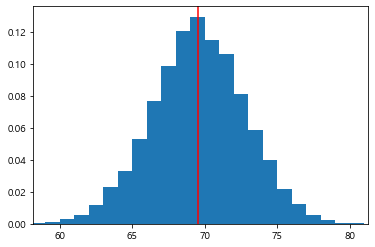

In [228]:
plt.hist( sample_mean, bins=100, range=(0,100), density=True ) # 상대도수분포
plt.xlim( sample_mean.min(), sample_mean.max() )
plt.axvline( scores.mean(), c='r')
# plt.vlines( scores.mean(), 0,0.15 )
plt.show()

표본평균의 평균은 **표본의 크기(x1, x2, ...)가 충분히 크면** 정규분포에 근사한다<br>
각 표본의 평균들이 모평균에 군집해있다

# 회귀선 도출하는 수업이 오늘의 핵심!!!